### Tugas Pertemuan 9 EVD

 **Nama :** Muhamad Taufiq Riza <br/>
 **NIM  :** 402019611021 <br/>
  **Judul       :** Klasifikasi Kelulusan Mahasiswa Berdasarkan IPK<br/>
 **Mata Kuliah :** Eksplorasi dan Visualisasi Data 

Klasifikasi adalah proses yang berkaitan dengan kategorisasi. Klasifikasi adalah cara yang bisa membantu memahami keragaman dengan lebih baik. Contoh manfaat klasifikasi adalah membantu mempelajari berbagai jenis tumbuhan dan hewan, ciri-ciri, persamaan dan perbedaannya.

Pada penerapan kali ini kami menggunakan 5 Metode klasifikasi dalam Mechine Learning, dalam menentukan kelulusan mahasiswa.

<div text-align:justify>
    
* **K-Nearest Neighbors (KNN)** <br/>
Seperti telah sedikit disinggung di tulisan sebelumnya, KNN pada prinsipnya akan mengklasifikasikan data baru ke kelas tertentu berdasarkan jarak data baru tersebut dengan k data terdekat.

* **Logistic Regression** <br/>
Algoritma ini biasa digunakan untuk menghitung nilai probabilitas, sehingga output yang dihasilkan berada antara nilai 0 hingga 1. Contoh penggunaannya adalah proses pengajuan kredit di bank.

* **Support Vector Machine (SVM)** <br/>
Algoritma ini pada dasarnya dapat digunakan untuk melakukan pengelompokan pada algoritma multidimensi. SVM mengelompokkan data menggunakan apa yang disebut sebagai hyperplane (classifier/pemisah).

* **Decision Trees** <br/>
Algoritma jenis ini melakukan tugasnya dengan menggunakan konsep struktur flowchart bercabang menggunakan decision rules atau aturan-aturan keputusan yang dibuat oleh desainernya.

* **Random Forest** <br/>
Random Forest merupakan kumpulan dari sejumlah Decision Tree. Oleh karena itu, prinsip dasar random forest mirip dengan decision tree. Masing-masing decision tree akan menghasilkan output (hasil) yang bisa saja berbeda-beda. Nah, random forest ini akan melakukan voting untuk menentukan hasil mayoritas dari semua decision tree.
    <div/>

**Import library python yang diperlukan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

**Load Dataset**

In [2]:
df = pd.read_csv("data_lulus.csv")
df.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [3]:
df.shape

(1687, 5)

In [4]:
df.columns

Index(['ip1', 'ip2', 'ip3', 'ip4', 'tepat'], dtype='object')

In [5]:
df.dtypes

ip1      float64
ip2      float64
ip3      float64
ip4      float64
tepat     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
ip1      1687 non-null float64
ip2      1687 non-null float64
ip3      1687 non-null float64
ip4      1687 non-null float64
tepat    1687 non-null object
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


In [7]:
df[df.duplicated()]

,ip1,ip2,ip3,ip4,tepat


In [8]:
df.duplicated().value_counts()

False    1687
dtype: int64

In [9]:
df.describe()

,ip1,ip2,ip3,ip4
count,1687.000000,1687.000000,1687.000000,1687.000000
mean,3.174458,3.170551,3.249988,3.285993
std,0.347761,0.454393,0.339506,0.398833
min,0.830000,0.230000,0.550000,0.900000
25%,3.020000,3.060000,3.120000,3.170000
50%,3.220000,3.270000,3.310000,3.390000
75%,3.405000,3.440000,3.460000,3.520000
max,3.860000,4.000000,3.920000,3.910000


In [10]:
df.corr()

,ip1,ip2,ip3,ip4
ip1,1.000000,0.581841,0.491602,0.418066
ip2,0.581841,1.000000,0.426875,0.420081
ip3,0.491602,0.426875,1.000000,0.550972
ip4,0.418066,0.420081,0.550972,1.000000


**Visualisasi Data Kelulusan Mahasiswa Berdasarkan IPK**

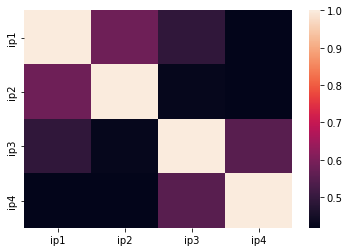

In [11]:
sns.heatmap(data=df.corr())

In [12]:
df['ip1'].value_counts()

3.32    44
3.52    40
3.25    34
3.15    34
3.50    33
        ..
1.86     1
2.27     1
2.47     1
3.76     1
1.62     1
Name: ip1, Length: 172, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

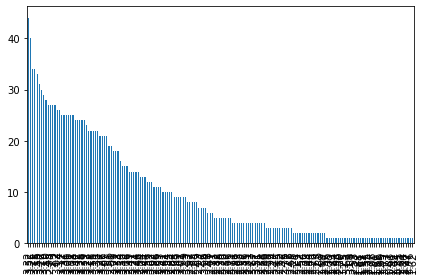

In [13]:
df['ip1'].value_counts().plot.bar()
plt.tight_layout()
plt.show

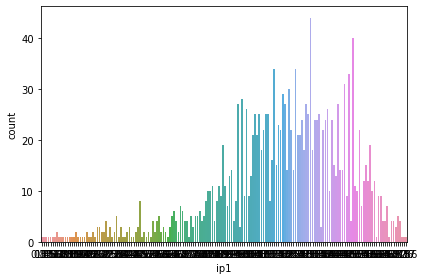

In [14]:
sns.countplot(data=df, x='ip1')
plt.tight_layout()

Text(0.5, 1.0, 'IP 4')

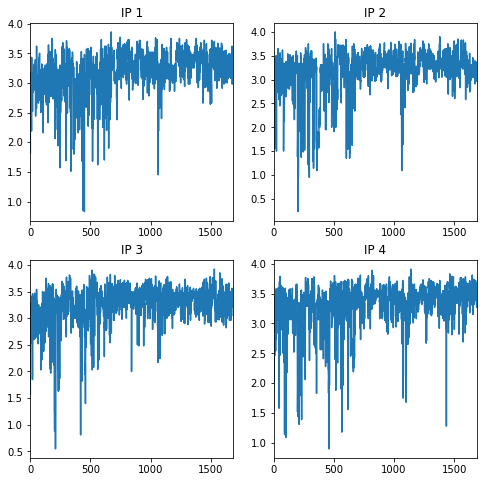

In [15]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

df['ip1'].plot.line(ax=ax[0][0])
ax[0][0].set_title('IP 1')

df['ip2'].plot.line(ax=ax[0][1])
ax[0][1].set_title('IP 2')

df['ip3'].plot.line(ax=ax[1][0])
ax[1][0].set_title('IP 3')

df['ip4'].plot.line(ax=ax[1][1])
ax[1][1].set_title('IP 4')



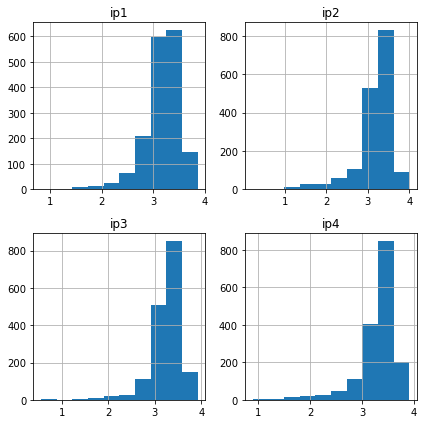

In [16]:
df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

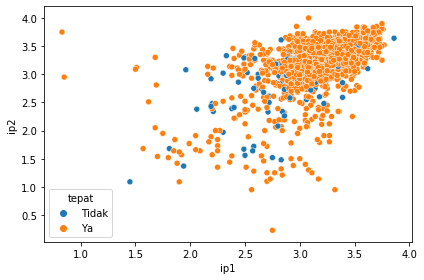

In [17]:
sns.scatterplot(x='ip1', y='ip2', data=df, hue='tepat')
plt.tight_layout()

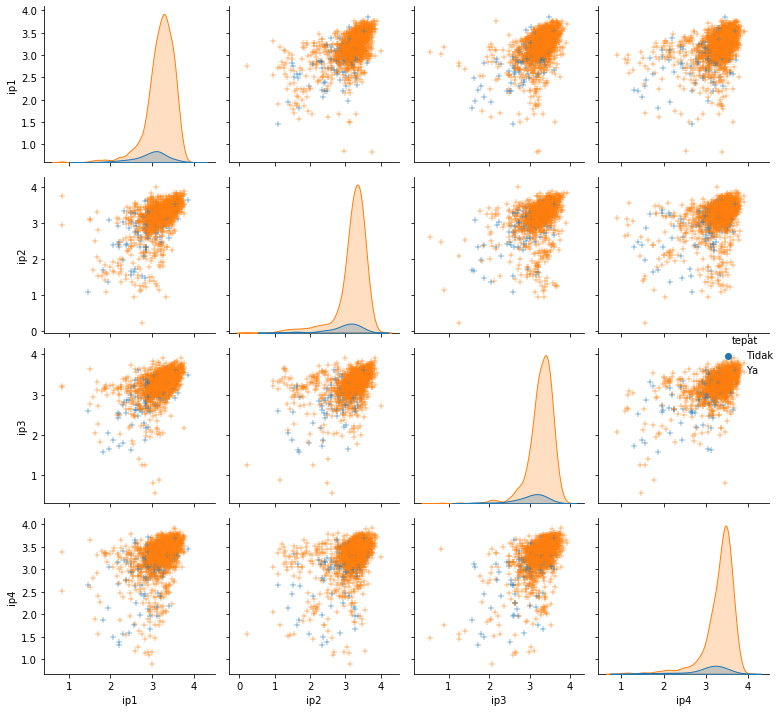

In [18]:
sns.pairplot(df, hue='tepat', markers='+')
plt.tight_layout()

**Klasifikasi menggunakan metode KNN**

In [19]:
X = df.drop(columns='tepat')
X.head()

,ip1,ip2,ip3,ip4
0,2.30,1.97,1.80,1.56
1,1.81,1.68,1.57,1.86
2,3.07,3.00,2.75,3.21
3,2.71,2.33,2.61,1.98
4,3.17,3.02,3.28,2.96


In [20]:
y = df['tepat']
y.head()

0    Tidak
1    Tidak
2    Tidak
3    Tidak
4    Tidak
Name: tepat, dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training_dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing_dataset')
print(X_test.shape)
print(y_test.shape)

training_dataset
(1012, 4)
(1012,)

testing_dataset
(675, 4)
(675,)


In [22]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

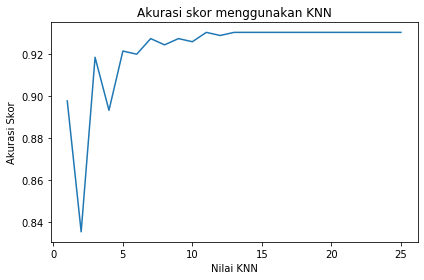

In [23]:
plt.plot(k_range, scores)
plt.xlabel('Nilai KNN')
plt.ylabel('Akurasi Skor')
plt.title('Akurasi skor menggunakan KNN')
plt.tight_layout()
plt.show()

In [24]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [25]:
print(accuracy_score(y_test, y_pred))

0.9185185185185185


In [26]:
print(confusion_matrix(y_test, y_pred))

[[  5  42]
 [ 13 615]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Tidak       0.28      0.11      0.15        47
          Ya       0.94      0.98      0.96       628

    accuracy                           0.92       675
   macro avg       0.61      0.54      0.56       675
weighted avg       0.89      0.92      0.90       675



**Logistic Regressions**

In [28]:
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [29]:
print(accuracy_score(y_test, y_pred))

0.9288888888888889


In [30]:
print(confusion_matrix(y_test, y_pred))

[[  2  45]
 [  3 625]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Tidak       0.40      0.04      0.08        47
          Ya       0.93      1.00      0.96       628

    accuracy                           0.93       675
   macro avg       0.67      0.52      0.52       675
weighted avg       0.90      0.93      0.90       675



**Klasifikasi menggunakan metode Suport Vector Classifier SVC**

In [32]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

In [33]:
print(accuracy_score(y_test, y_pred))

0.9303703703703704


In [34]:
# print(classification_report(y_test, y_pred))

**Klasifikasi menggunakan metode Decisons Tree**

In [41]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))

0.8711111111111111


 **Klasifikasi menggunakan metode Random Forest**

In [37]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [38]:
print(accuracy_score(y_test, y_pred))

0.9274074074074075


In [39]:
models = [model_knn, model_lr, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.9185185185185185, 0.9288888888888889, 0.9303703703703704, 0.8725925925925926, 0.9274074074074075]


**Komparasi Hasil dari beberapa metode**

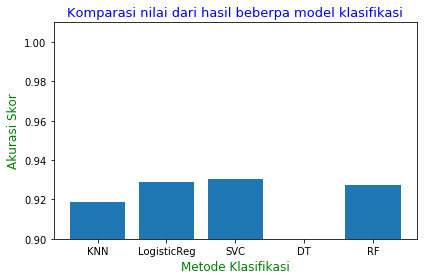

In [45]:
plt.bar(['KNN', 'LogisticReg', 'SVC', 'DT', 'RF'], accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Komparasi nilai dari hasil beberpa model klasifikasi', fontsize=13, color='b')
plt.xlabel('Metode Klasifikasi', fontsize=12, color='g')
plt.ylabel('Akurasi Skor', fontsize=12, color='g')
plt.tight_layout()
plt.show()